## Exploratory Data Analysis(EDA) on haberman Dataset

Haberman Dataset is the dataset that gives us the survival rate of cancer patients after they 
took treatment in a particular year.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#reading the haberman's dataset 
#the extracted information is stored in the form of dataframe
survival_dataset = pd.read_csv('haberman.csv')

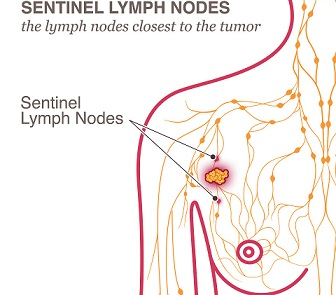

In [98]:
#1. Age of patient at time of operation (numerical) 
#2. Patient's year of operation (year - 1900, numerical) 
#3. Number of positive axillary nodes detected (numerical) 

#![title](lymph nodes.jpg)

from IPython.display import Image
Image("lymph nodes.jpg")

For this Analysis its important for us to get an introductory idea of positive auxilary nodes
axillary lymph nodes are the nodes to wich breast cancer often spreads to , thus taking the cancer cells to other parts of the body. 

[kindly, refer to the below given Image]

In [99]:
#Lets find the no of Datapoints
survival_dataset.shape

(306, 4)

In [4]:
#(306 , 4) denotes that the data has four attributes and each  has 306 instances in it.
#Out of four one is the class attribute i.e, the status which tells weather a person survived less than 5 years 
#or more than five years
#4. Survival status (class attribute) 
#-- 1 = the patient survived 5 years or longer 
#-- 2 = the patient died within 5 year


#A class attribute is an attribute whose value we will predict based on the other attributes

In [5]:
#Lets find the fearures of this Dataset
#or Lets find the attributes of this Dataset
survival_dataset.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
#Lets find the general statistics our data for different attributes such as age , year , nodes , status
survival_dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
#Lets find how many datapoints are there for a particular class
survival_dataset['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# 1 - Bivariate Analysis

Text(0.5,1,'Scatter plot for age v/s nodes')

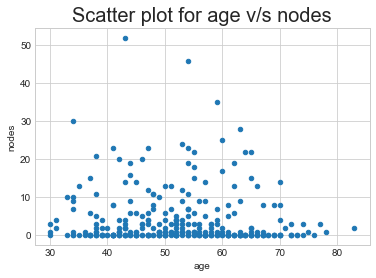

In [100]:
survival_dataset.plot(kind = 'scatter' , x = 'age', y = 'nodes')
a ={
    'fontsize': 20,
    'fontweight' :5,
    'verticalalignment': 'baseline'}

plt.title('Scatter plot for age v/s nodes' , a)

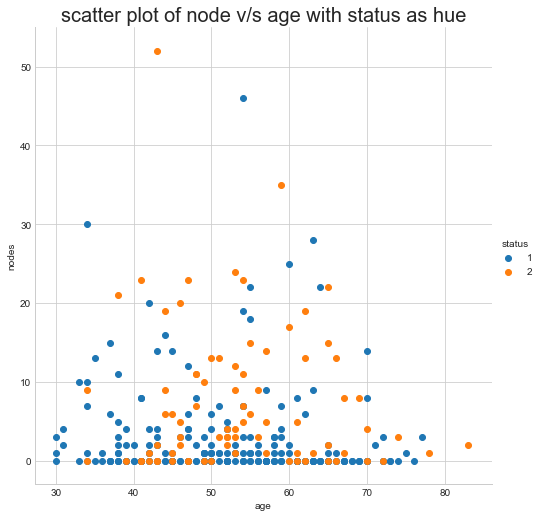

In [73]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
g = sns.FacetGrid(survival_dataset, hue="status", size = 7)
g.map(plt.scatter, "age", "nodes") 

plt.title("scatter plot of node v/s age with status as hue" , a)
g.add_legend();

**Obervations:-**

1) Nothing can be concluded between about the relationship between age and the auxillary nodes from 
   above mentioned graph

# Pair Plot

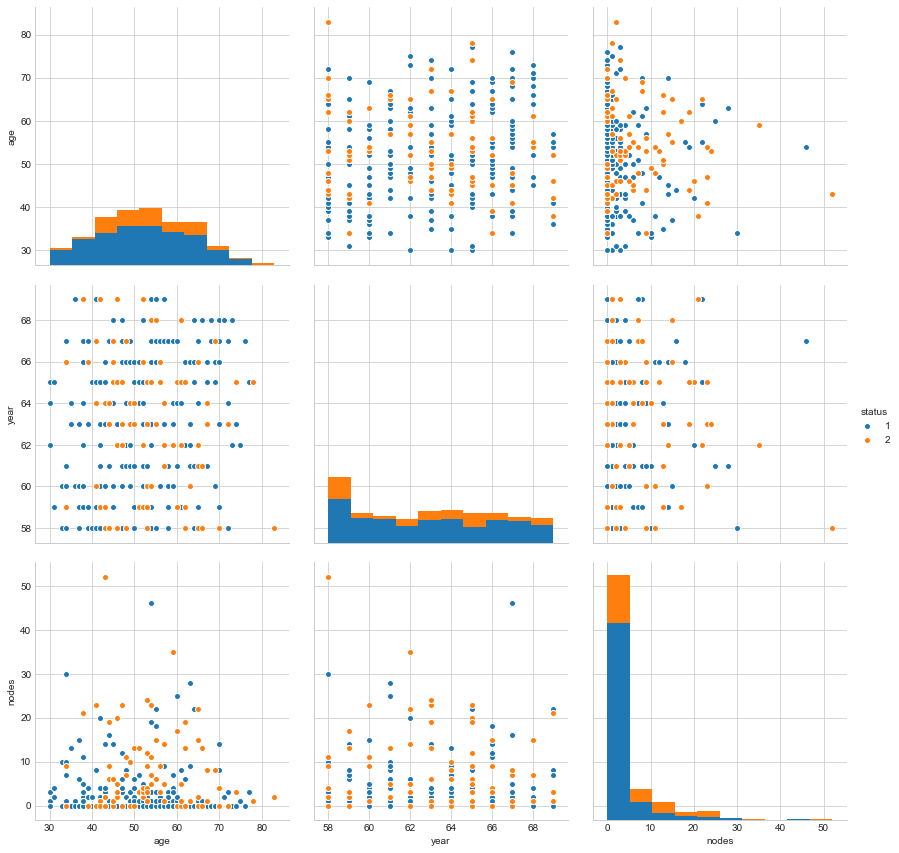

In [103]:
#Pair Plots
sns.set_style("whitegrid");
#sns.pairplot(survival_dataset[['age' , 'year' , 'nodes']] , aspect = 2);
sns.pairplot(survival_dataset  , vars = ['age' , 'year' , 'nodes'] ,  hue = 'status' , size = 4)

plt.show()

**Observations:-**
1) Nothing significant can be understood from the above pair plots

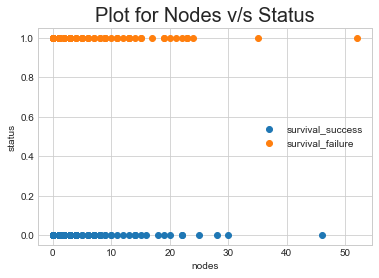

In [83]:
import numpy as np
suvival_success = survival_dataset[survival_dataset['status'] == 1]
survival_failure = survival_dataset[survival_dataset['status'] == 2]

plot1, = plt.plot(suvival_success['nodes'] , np.zeros_like(suvival_success['nodes'] ), 'o')
plot2, = plt.plot(survival_failure['nodes'] , np.ones_like(survival_failure['nodes'] ), 'o')

plt.xlabel('nodes')
plt.ylabel('status')

plt.legend([plot1 , plot2] , ['survival_success' , 'survival_failure'])

plt.title('Plot for Nodes v/s Status' , a)

plt.show()

**Observations:-**
1) Nothing significant can be concluded from the above graph

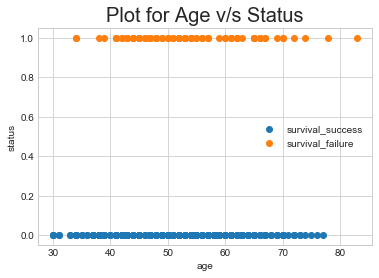

In [81]:
import numpy as np
survival_success = survival_dataset[survival_dataset['status'] == 1]
survival_failure = survival_dataset[survival_dataset['status'] == 2]

plot1, = plt.plot(survival_success['age'] , np.zeros_like(suvival_success['age'] ), 'o')
plot2, = plt.plot(survival_failure['age'] , np.ones_like(survival_failure['age'] ), 'o')

plt.xlabel('age')
plt.ylabel('status')

plt.legend([plot1 , plot2] , ['survival_success' , 'survival_failure'])

plt.title('Plot for Age v/s Status' , a)
plt.show()

**Observations:-**

1) From the above graph it can be concluded that people with less than 40 years of age have higher chances of survival

# Univariate Analysis

Text(0.5,1,'Histogram with KDE Plot for nodes v/s Status')

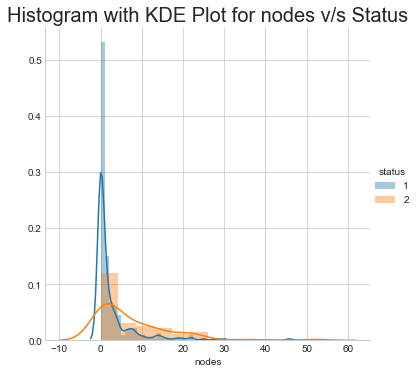

In [85]:
sns.FacetGrid(survival_dataset , hue = 'status' , size = 5) \
   .map(sns.distplot , 'nodes') \
   .add_legend()

plt.title('Histogram with KDE Plot for nodes v/s Status' , a)

**Observations:-**
from the above pdf we can conclude that the probability of having less no of  positive node and surviving
is better that probability of having more no of nodes.
i.e, patients having more no of auxillary node have less chances of surviving 
this is one of the obvious reasons and confirms the risks of auxillary nodes being present

Text(0.5,1,'Histogram with KDE Plot for Age v/s Status')

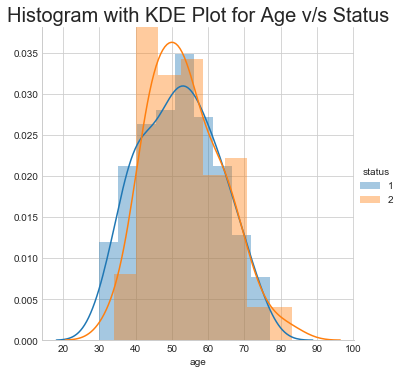

In [86]:
sns.FacetGrid(survival_dataset , hue = 'status' , size = 5) \
   .map(sns.distplot , 'age') \
   .add_legend()

plt.title('Histogram with KDE Plot for Age v/s Status' , a)

**Observations:-**
from the above graph we can conclude that patients with age less than 40 years have greater
chances of survival

Text(0.5,1,'Histogram with KDE Plot for Year of Operation v/s Status')

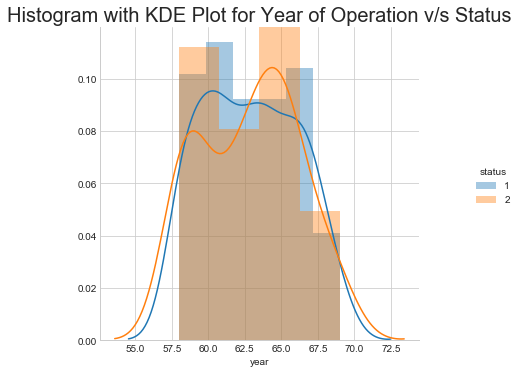

In [87]:
sns.FacetGrid(survival_dataset , hue = 'status' , size = 5) \
   .map(sns.distplot , 'year') \
   .add_legend()

plt.title('Histogram with KDE Plot for Year of Operation v/s Status' , a)

**Observations:-**
we cannot conclude any significant conclusion from the above graph


Now we have got some conclusions from the age-status and node-status.
Next, to better contify our results we will see the % 
To see this we will plot the CDF for the above two shortlisted parameters i.e, age , node

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


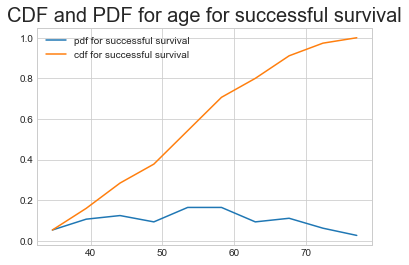

In [90]:
#Plotting the CDF for age

counts , bin_edges = np.histogram(survival_success['age'] , bins = 10 , density = True)
pdf = counts/sum(counts)

print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plot1 , = plt.plot(bin_edges[1:],pdf)
plot2 , =  plt.plot(bin_edges[1:], cdf)
plt.legend([plot1 , plot2] , ["pdf for successful survival" , "cdf for successful survival"])

plt.title('CDF and PDF for age for successful survival' , a)

plt.show()

**Observations:-**

1) from the above plot we can see that patients with age greater than 60 years of age which are approx 23% of the
   patients have increased risk to their survival

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


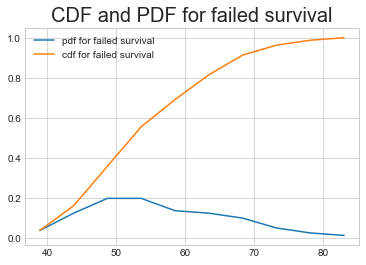

In [91]:
counts , bin_edges = np.histogram(survival_failure['age'] , bins = 10 , density = True)
pdf = counts/sum(counts)

print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plot3 , = plt.plot(bin_edges[1:],pdf)
plot4 , = plt.plot(bin_edges[1:], cdf)
plt.legend([plot3 , plot4] , ["pdf for failed survival" , "cdf for failed survival"])

plt.title('CDF and PDF for failed survival' , a)

plt.show()

**Observations:-**

1) from the above plot it can also be concluded that age group between 47yrs - 54yrs have high threat to their survival

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


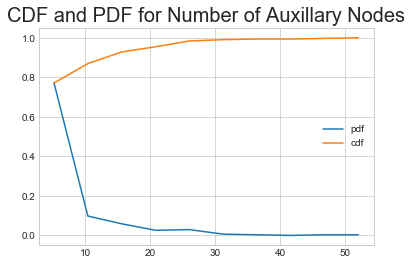

In [92]:
counts , bin_edges = np.histogram(survival_dataset['nodes'] , bins = 10 , density = True)
pdf = counts/sum(counts)

print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plot1 , = plt.plot(bin_edges[1:],pdf)
plot2 , = plt.plot(bin_edges[1:], cdf)

plt.legend([plot1 , plot2] , ['pdf' , 'cdf'])

plt.title('CDF and PDF for Number of Auxillary Nodes' , a)

plt.show()

**Observations:-**
 
1)the above graph it can be seen than approx 82% is the survival probability of the patients have nodes 10 and have higher chances of survival

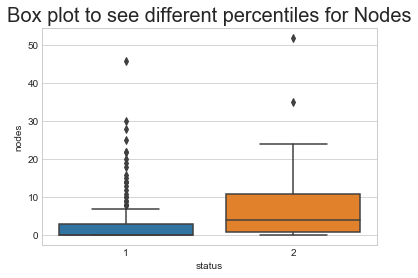

In [93]:
sns.boxplot(x='status',y='nodes', data = survival_dataset , fliersize=5)

plt.title('Box plot to see different percentiles for Nodes' , a)

plt.show()

**Observations:-**

from the above box plot we can infer that around patients having 13 nodes or less have greater chance of survival
and patients with 13 nodes or higher have increases risk of failure

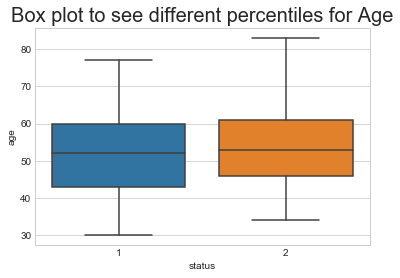

In [96]:
sns.boxplot(x='status',y='age', data = survival_dataset , fliersize=5)

plt.title('Box plot to see different percentiles for Age' , a)

plt.show()


**Observations:-**
from the above plot we can see that patients with approx 47 years of age or less have higher chanses of survival

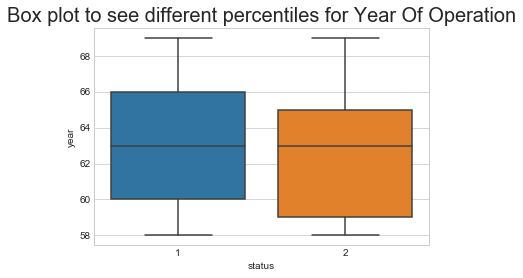

In [95]:
sns.boxplot(x='status',y='year', data = survival_dataset , fliersize=5)

plt.title('Box plot to see different percentiles for Year Of Operation' , a)

plt.show()


**Observations:-**
from the above plot it can be seen that a patient had lower chances of survival if he was operated on or before 1960

# FINAL CONCLUSIONS AFTER ANALYZING THE DATASET

1) The two most import features that influence survival are age and node of positive auxillary nodes.

**1.1) AGE:-**

  1.1.1) Patients with less than 40 years of age have greater chances of survival whereas patients with age greater than 60     years
   have increased risk.
   
  1.1.2) To be more precise with the help of box plot we can see that people than 47 years of age that are approx 37% of the patients
   have increased chances of survival than Others
   
**1.2) NUMBER OF POSITIVE AUXILLARY NODES:-**

  1.2.1) Less no of auxillary nodes leads to greater chances of survival

  1.2.2) To be precise patients with less than 10 nodes have a very large probability of surviving(~82%)

**1.3) YEAR OF OPERATION**

  1.3.1)  Patient had lower chances of survival if he was operated on or before 1960 , may be due to lack of good medical
    facilities.

**THE END**